In [7]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [8]:
N=50
x_start,x_end=-2,2
y_start,y_end=-1,1
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)

In [9]:
class Source:
    def __init__(self,strength,x,y):
        self.strength=strength
        self.x,self.y=x,y
        
    def velocity(self,X,Y):
        self.u=self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)    
        self.v=self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    
    def stream_function(self,X,Y):
        self.psi=self.strength/(2*math.pi)*numpy.arctan2((Y-self.y),(X-self.x))

In [10]:
strength_source=1
x_source,y_source=0,0.5
source=Source(strength_source,x_source,y_source)
source.velocity(X,Y)
source.stream_function(X,Y)

In [11]:
source_image=Source(strength_source,x_source,-y_source)
source_image.velocity(X,Y)
source_image.stream_function(X,Y)

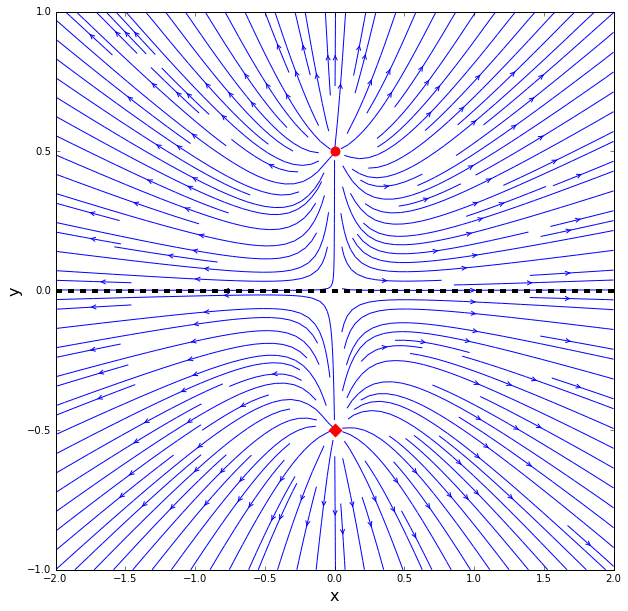

In [12]:
u=source.u+source_image.u
v=source.v+source_image.v
psi=source.psi+source_image.psi

#plot the streamline of the source near a wall
pyplot.figure(figsize=(10,10))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(source.x, source.y, color='r', s=80, marker='o')
pyplot.scatter(source_image.x, source_image.y, color='r', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [13]:
class Vortex:
    def __init__(self,strength,x,y):
        self.strength=strength
        self.x,self.y=x,y
    def velocity(self,X,Y):
        self.u=self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
        self.v=-self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
    def stream_function(self,X,Y):
        self.psi=self.strength/(4*math.pi)*numpy.log((X-self.x)**2+(Y-self.y)**2)

In [14]:
gamma=1
x_v,y_v=0,0.5
vortex=Vortex(gamma,x_v,y_v)
vortex.velocity(X,Y)
vortex.stream_function(X,Y)

vortex_imag=Vortex(-gamma,x_v,-y_v)
vortex_imag.velocity(X,Y)
vortex_imag.stream_function(X,Y)

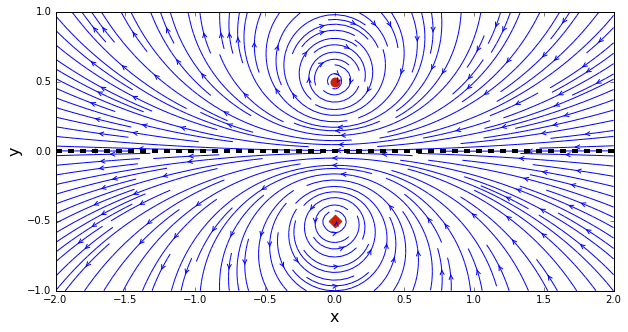

In [15]:
u=vortex.u+vortex_imag.u
v=vortex.v+vortex_imag.v
psi=vortex.psi+vortex_imag.psi

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_imag.x, vortex_imag.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

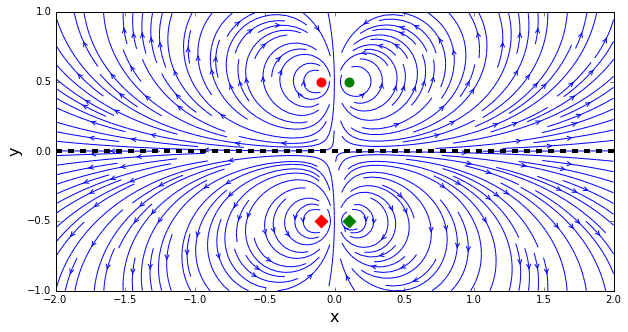

In [24]:
strength_vortex=1
x_vortex1,y_vortex1=-0.1,0.5
x_vortex2,y_vortex2=0.1,0.5

vortex1=Vortex(strength_vortex,x_vortex1,y_vortex2)
vortex2=Vortex(-strength_vortex,x_vortex2,y_vortex2)
vortex1.velocity(X,Y)
vortex1.stream_function(X,Y)
vortex2.velocity(X,Y)
vortex2.stream_function(X,Y)

vortex1_imag=Vortex(-strength_vortex,x_vortex1,-y_vortex1)
vortex2_imag=Vortex(strength_vortex,x_vortex2,-y_vortex2)
vortex1_imag.velocity(X,Y)
vortex1_imag.stream_function(X,Y)
vortex2_imag.velocity(X,Y)
vortex2_imag.stream_function(X,Y)

#superposition
u=vortex1.u+vortex1_imag.u+vortex2.u+vortex2_imag.u
v=vortex1.v+vortex1_imag.v+vortex2.v+vortex2_imag.v
psi=vortex1.psi+vortex1_imag.psi+vortex2.psi+vortex2_imag.psi

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='r', s=80, marker='o')
pyplot.scatter(vortex1_imag.x, vortex1_imag.y, color='r', s=80, marker='D')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex2_imag.x, vortex2_imag.y, color='g', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [45]:
#doublet
u_inf=1
u_freestream=u_inf*numpy.ones_like(X)
v_freestream=numpy.zeros_like(X)
psi_freestream=u_inf*Y

In [46]:
class Doublet:
    def __init__(self,kappa,x,y):
        self.kappa=kappa
        self.x=x
        self.y=y
    def velocity(self,X,Y):
        self.u=-self.kappa/(2*math.pi)*((X-self.x)**2-(Y-self.y)**2)/\
        ((X-self.x)**2+(Y-self.y)**2)**2
        self.v=-self.kappa/(2*math.pi)*2*(X-self.x)*(Y-self.y)\
        /((X-self.x)**2+(Y-self.y)**2)**2
    def stream_function(self,X,Y):
        self.psi=-self.kappa/(2*math.pi)*(Y-self.y)/\
        ((X-self.x)**2+(Y-self.y)**2)**2
            

In [47]:
kappa=1
x_doublet,y_doublet=0,0.3

doublet=Doublet(kappa,x_doublet,y_doublet)
doublet.velocity(X,Y)
doublet.stream_function(X,Y)

doublet_imag=Doublet(kappa,x_doublet,-y_doublet)
doublet_imag.velocity(X,Y)
doublet_imag.stream_function(X,Y)


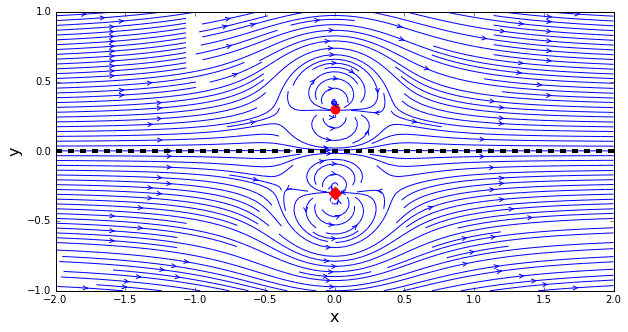

In [49]:
#superpostion
u=u_freestream+doublet.u+doublet_imag.u
v=v_freestream+doublet.v+doublet_imag.v
psi=psi_freestream+doublet.psi+doublet_imag.psi

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
pyplot.scatter(doublet.x, -doublet.y, color='r', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);